In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
df = pd.read_csv('data/iris.csv')
iris = df
df.head()
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df["species"]
# 125 training and 25 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25,
 random_state=1, stratify=y)
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
for d in range(2,10):
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)
    y_hat = tree.predict(X_test)
    actual_depth = tree.get_depth()
    print("Depth: ", actual_depth,
         "Acuracy: ", metrics.accuracy_score(y_test, y_hat))

Depth:  2 Acuracy:  0.92
Depth:  3 Acuracy:  0.96
Depth:  4 Acuracy:  0.96
Depth:  5 Acuracy:  0.96
Depth:  6 Acuracy:  0.96
Depth:  6 Acuracy:  0.96
Depth:  6 Acuracy:  0.96
Depth:  6 Acuracy:  0.96


In [11]:
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

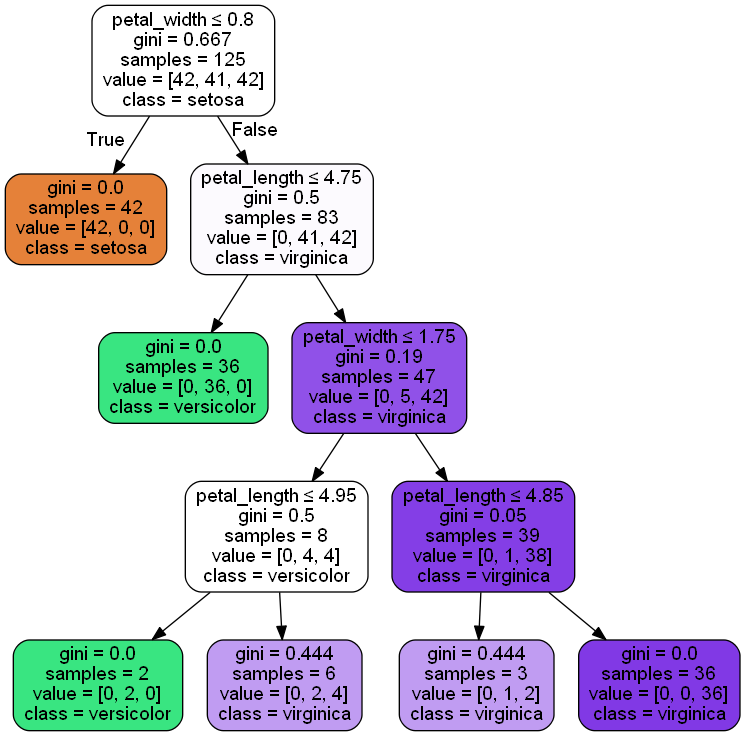

In [12]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
target_names = ["setosa", "versicolor", "virginica"]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True, feature_names = feature_names,
 class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/iris1.png')
Image(graph.create_png())